In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from matplotlib import rc
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
bus = pd.read_excel('버스승하차.xlsx')

In [3]:
bus.head()

,사용일자,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20231201,100,100번(하계동~용산구청),100000002,1002,창경궁.서울대학교병원(00031),98,145,20231204
1,20231201,542,542번(군포버스공영차고지~신사역),121000206,22282,서울시품질시험소한국교원단체총연합회(00057),33,22,20231204
2,20231201,542,542번(군포버스공영차고지~신사역),121000205,22281,서울시품질시험소한국교원단체총연합회(00082),33,37,20231204
3,20231201,542,542번(군포버스공영차고지~신사역),121000200,22276,우성아파트.양재초등학교(00060),109,51,20231204
4,20231201,542,542번(군포버스공영차고지~신사역),121000199,22275,우성아파트.양재초등학교(00079),24,67,20231204


In [4]:
bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1048575 non-null  int64 
 1   노선번호        1048575 non-null  object
 2   노선명         1048575 non-null  object
 3   표준버스정류장ID   1048575 non-null  int64 
 4   버스정류장ARS번호  1048575 non-null  object
 5   역명          1048575 non-null  object
 6   승차총승객수      1048575 non-null  int64 
 7   하차총승객수      1048575 non-null  int64 
 8   등록일자        1048575 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 72.0+ MB


In [5]:
# 12월 25일의 데이터 추출
bus = bus[bus['사용일자'] == 20231225]

In [7]:
bus.head()

,사용일자,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
974479,20231225,505,505번(노온사동~서울역),102000012,3012,갈월동(00054),95,19,20231228
974480,20231225,505,505번(노온사동~서울역),102000036,3130,남영역(00044),7,104,20231228
974481,20231225,505,505번(노온사동~서울역),102000037,3131,남영역(00057),51,17,20231228
974482,20231225,505,505번(노온사동~서울역),102000038,3132,용산전자상가17동(00059),24,47,20231228
974483,20231225,505,505번(노온사동~서울역),102000039,3133,용산전자상가19동(00042),25,18,20231228


In [8]:
bus['노선번호'].value_counts()

N61      362
N75      321
N72      300
N62      300
N64      294
        ... 
관악07      10
8146       9
은평01       8
동대문01      6
8641       5
Name: 노선번호, Length: 612, dtype: int64

In [9]:
# 노선(버스종류)이 총 612개 => 너무 많다
len(bus['노선번호'].unique())

612

In [57]:
bus_500 = bus[bus['하차총승객수']>=500]

In [58]:
bus_500

,사용일자,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
974526,20231225,505,505번(노온사동~서울역),120000001,21001,구로디지털단지역(00027),247,772,20231228
974580,20231225,702A,"702번(A,서오릉방향,서오릉~종로1가)",101000041,2140,롯데백화점(00038),648,741,20231228
974581,20231225,702A,"702번(A,서오릉방향,서오릉~종로1가)",101000141,2246,을지로입구역.광교(00037),141,549,20231228
974591,20231225,702A,"702번(A,서오릉방향,서오릉~종로1가)",111000043,12131,응암역신사오거리(00020),384,640,20231228
974692,20231225,704,704번(북한산성~서울역),111001116,12112,구파발역.롯데몰(00032),258,623,20231228
...,...,...,...,...,...,...,...,...,...
1014301,20231225,500,500번(석수역~을지로입구),119000024,20114,노량진역3번출구(00031),68,539,20231228
1014452,20231225,504,504번(광명공영차고지~남대문),101000031,2126,남대문시장(00045),196,574,20231228
1014468,20231225,504,504번(광명공영차고지~남대문),117000027,18113,금천패션아울렛사거리.마리오(00079),192,686,20231228
1014471,20231225,504,504번(광명공영차고지~남대문),119000024,20114,노량진역3번출구(00035),116,759,20231228


In [60]:
len(bus_500['표준버스정류장ID'].unique())

231

In [61]:
bus_700 = bus[bus['하차총승객수']>=700]

In [62]:
bus_700

,사용일자,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
974526,20231225,505,505번(노온사동~서울역),120000001,21001,구로디지털단지역(00027),247,772,20231228
974580,20231225,702A,"702번(A,서오릉방향,서오릉~종로1가)",101000041,2140,롯데백화점(00038),648,741,20231228
975060,20231225,5413,5413번(시흥~고속터미널),120000018,21117,신림사거리.신림역(00021),223,1108,20231228
975453,20231225,5531,5531번(군포공영차고지~노량진),120000001,21001,구로디지털단지역(00044),436,808,20231228
975535,20231225,5535,5535번(하안동~노량진),119000024,20114,노량진역3번출구(00038),8,736,20231228
...,...,...,...,...,...,...,...,...,...
1013547,20231225,370,370번(강동공영차고지~충정로역),124000454,25014,천호역(00075),758,757,20231228
1013685,20231225,6515,6515번(양천차고지~삼막사거리),118000006,19006,영등포역(00096),540,1066,20231228
1014189,20231225,303,303번(성남~신설동),123000002,24002,잠실역.잠실대교남단(00075),600,771,20231228
1014193,20231225,303,303번(성남~신설동),123000579,24017,잠실역.롯데월드몰(00035),678,823,20231228


In [63]:
bus_1000 = bus[bus['하차총승객수']>=1000]

In [64]:
bus_1000

,사용일자,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
975060,20231225,5413,5413번(시흥~고속터미널),120000018,21117,신림사거리.신림역(00021),223,1108,20231228
976271,20231225,5714,5714번(광명공영차고지~이대입구),118000465,19821,경방타임스퀘어.신세계백화점(00067),656,1453,20231228
978526,20231225,9401,9401번(구미동~서울역),101000002,2002,서울백병원.국가인권위.안중근활동터(00030),217,1282,20231228
981503,20231225,143,143번(정릉~개포동),101000041,2140,롯데백화점(00020),1274,1305,20231228
981537,20231225,143,143번(정릉~개포동),121000020,22020,고속터미널(00028),595,1650,20231228
982359,20231225,152,152번(화계사~삼막사사거리),119000314,21377,신림역2번출구(00082),354,1135,20231228
986322,20231225,643,643번(양천차고지~강남역),121000020,22020,고속터미널(00037),472,1041,20231228
986324,20231225,5515,5515번(신동아아파트~청림동현대아파트),120000150,21252,서울대입구역(00012),488,1400,20231228
986406,20231225,광진05,광진05(신자초등학교~강변역),104000125,5218,건대로데오거리입구(00031),591,1105,20231228
987246,20231225,1132,1132번(월계동~노원역),110000113,11213,와우패션클럽(00033),155,1002,20231228


In [65]:
len(bus_1000)

41

In [ ]:
# 하차승객수가 1000명인 이상인 데이터는 총 41개
# '역명'을 살펴보면 같은 홍대입구가 2개 존재한다
# 동일한 역에서 하차했음에도 노선이 다르기 때문에 다른 데이터로 취급된다
# 홍대입구 뿐만 아니라 같은 역에서 내렸지만, 다른 버스노선이기 때문에 총합이 1000명 이상임에도 추출되지 않는 데이터가 존재하지 않는것으로 판단됨.

In [ ]:
# '역'이름을 기준을 데이터를 묶어보자

In [69]:
# 데이터를 슬라이싱하여 '역명'에서 괄호 안의 코드를 제거하자
bus['역'] = bus['역명'].apply(lambda x: x[:-7])

In [70]:
bus.head()

,사용일자,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,역
974479,20231225,505,505번(노온사동~서울역),102000012,3012,갈월동(00054),95,19,20231228,갈월동
974480,20231225,505,505번(노온사동~서울역),102000036,3130,남영역(00044),7,104,20231228,남영역
974481,20231225,505,505번(노온사동~서울역),102000037,3131,남영역(00057),51,17,20231228,남영역
974482,20231225,505,505번(노온사동~서울역),102000038,3132,용산전자상가17동(00059),24,47,20231228,용산전자상가17동
974483,20231225,505,505번(노온사동~서울역),102000039,3133,용산전자상가19동(00042),25,18,20231228,용산전자상가19동


In [74]:
# '역'이름이 같은경우 하차총승객수를 합친다
bus_station = bus[['역','하차총승객수']]
bus_station = bus_station.reset_index(drop=True)

In [75]:
bus_station

,역,하차총승객수
0,갈월동,19
1,남영역,104
2,남영역,17
3,용산전자상가17동,47
4,용산전자상가19동,18
...,...,...
40057,광명차고지,0
40058,광명공영차고지종점,19
40059,철산주공8단지,73
40060,모세로삼거리,17


In [78]:
station_sum = bus_station.groupby('역')['하차총승객수'].sum()

In [79]:
station_sum

역
(구)경남호텔앞           603
(구)법화사              19
11단지                21
123전자타운.2001아울렛    244
12번지건영아파트          154
                  ... 
힐스테이트판교엘포레4단지        4
힐스테이트판교엘포레6단지        1
힐스테이트판교엘포레6단지후문      1
힐탑                   6
힐튼호텔               872
Name: 하차총승객수, Length: 8050, dtype: int64

In [83]:
station_sum_df = station_sum.reset_index()

In [84]:
station_sum_df

,역,하차총승객수
0,(구)경남호텔앞,603
1,(구)법화사,19
2,11단지,21
3,123전자타운.2001아울렛,244
4,12번지건영아파트,154
...,...,...
8045,힐스테이트판교엘포레4단지,4
8046,힐스테이트판교엘포레6단지,1
8047,힐스테이트판교엘포레6단지후문,1
8048,힐탑,6


In [105]:
# 하차총승객수가 6000명이상인 데이터를 추출한 결과 20개의 행이 추출되었다.
df_1 = station_sum_df[station_sum_df['하차총승객수'] >= 6000]

In [106]:
df_1

,역,하차총승객수
581,경방타임스퀘어.신세계백화점,12274
685,고속터미널,12853
889,광화문,9727
953,구로디지털단지역,10230
954,구로디지털단지역(중),6222
2001,돈암사거리.성신여대입구,7793
2044,동대문역.흥인지문,7353
2367,롯데백화점,6163
2818,미아사거리역,12105
4040,서울역버스환승센터,10710


In [107]:
len(df_1)

20

In [115]:
# 내림차순으로 정렬
sorted_bus_station_desc = df_1.sort_values(by='하차총승객수', ascending=False)

In [138]:
unique_stations = sorted_bus_station_desc['역'].unique()

In [117]:
sorted_bus_station_desc

,역,하차총승객수
7845,홍대입구역,15591
685,고속터미널,12853
581,경방타임스퀘어.신세계백화점,12274
2818,미아사거리역,12105
4040,서울역버스환승센터,10710
953,구로디지털단지역,10230
889,광화문,9727
4611,수유역.강북구청,9491
6822,지하철2호선강남역,9022
4837,신도림역,8754


<AxesSubplot:xlabel='역', ylabel='하차총승객수'>

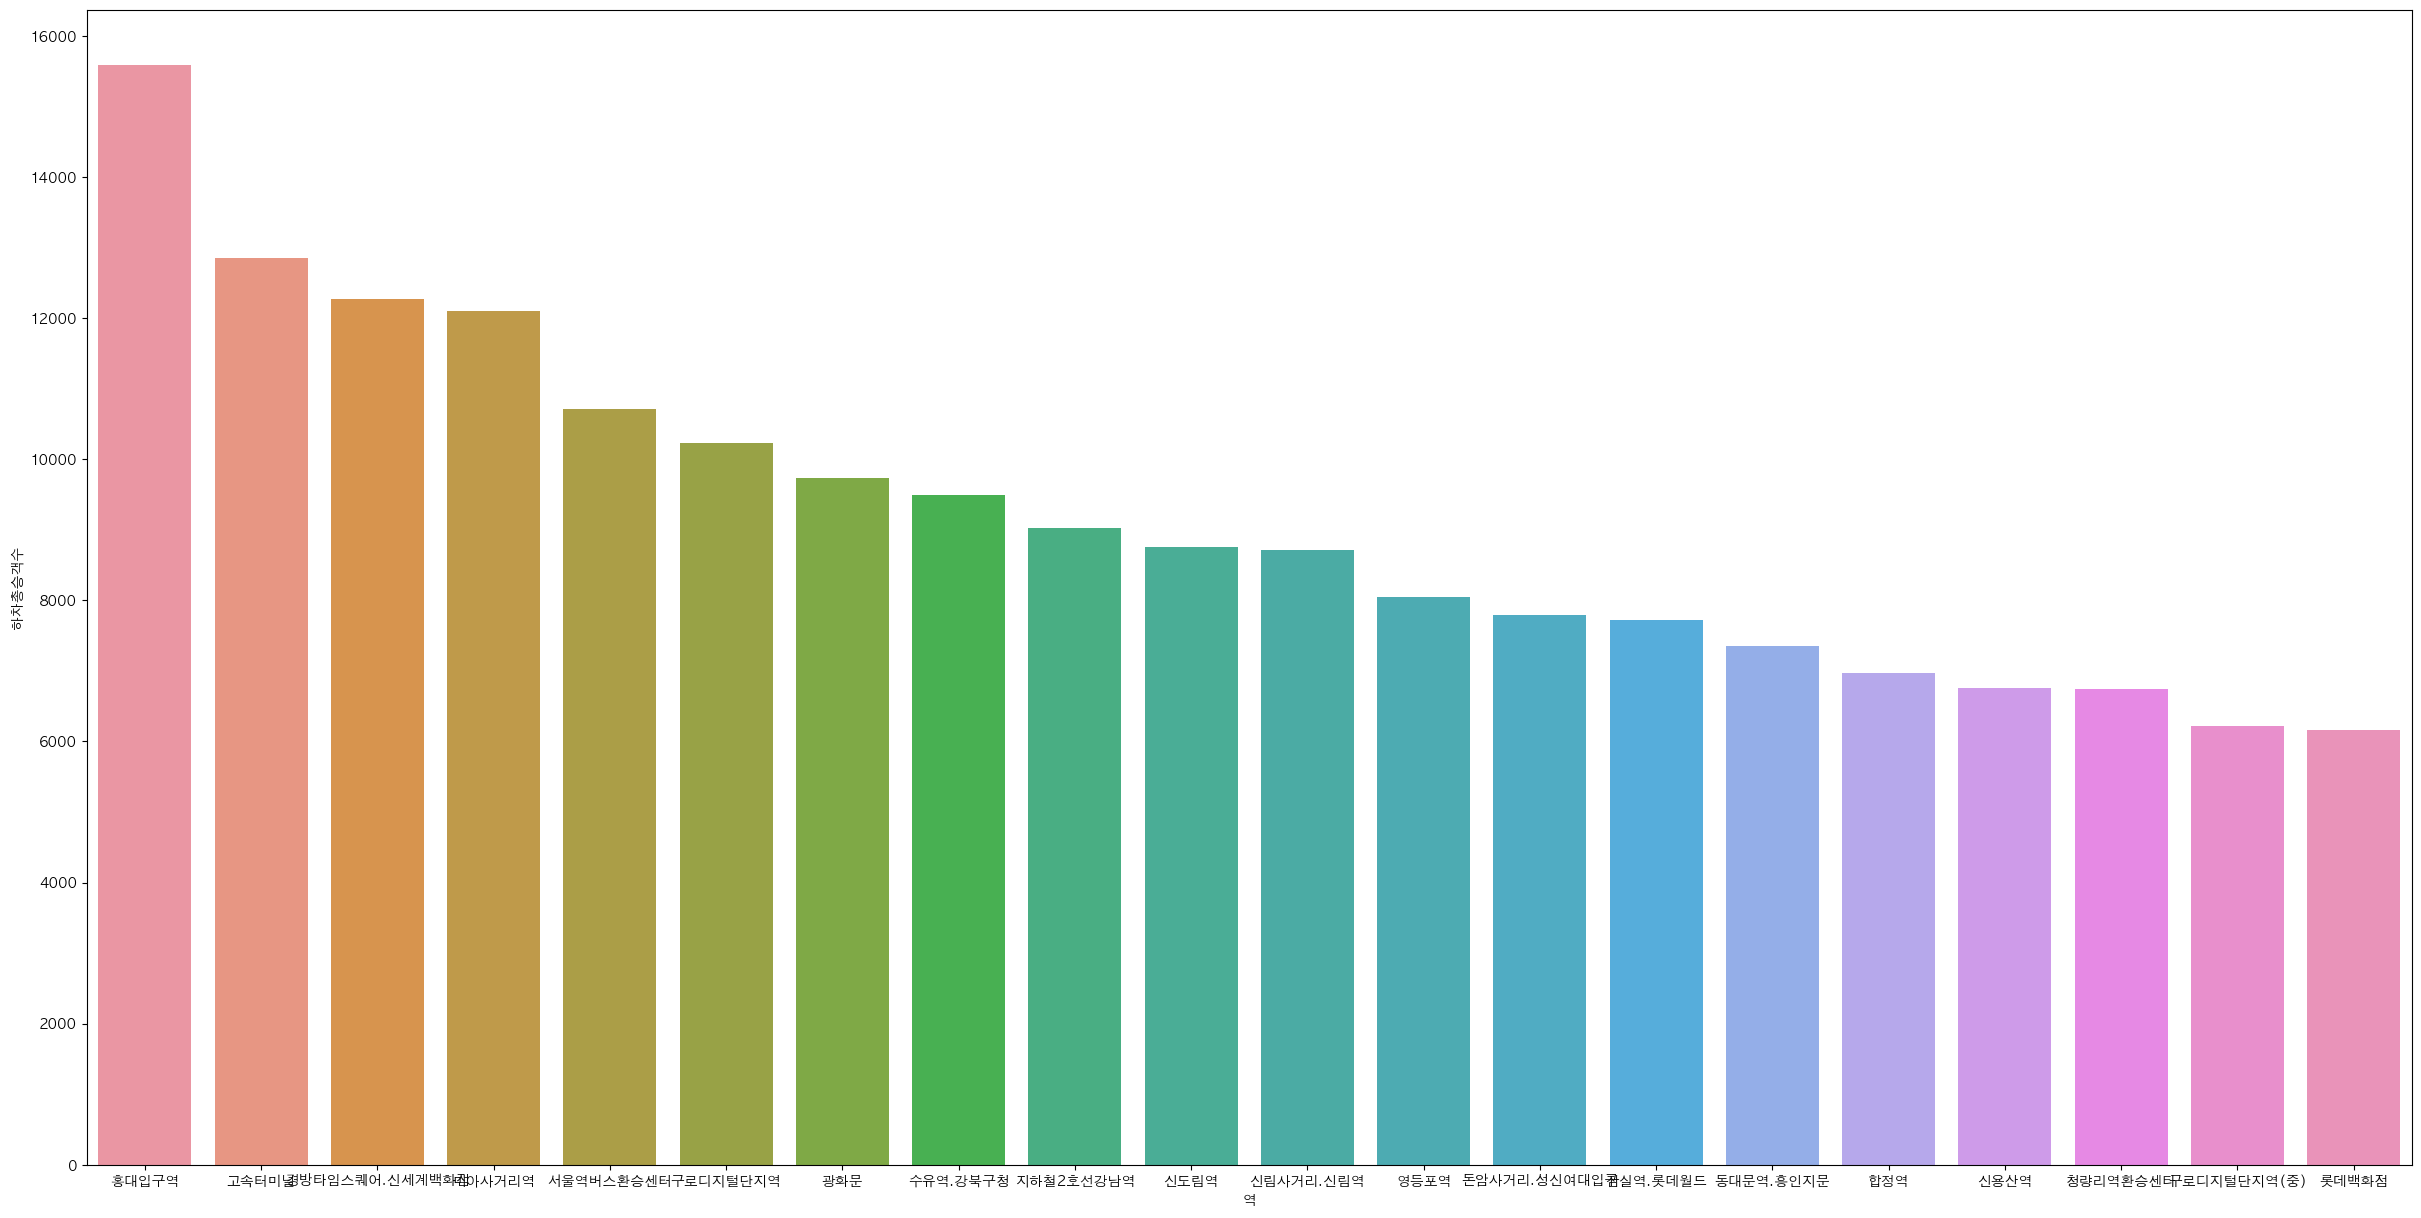

In [116]:
plt.figure(figsize=(30, 15))
sns.barplot(x=sorted_bus_station_desc['역'],y=sorted_bus_station_desc['하차총승객수'])

In [118]:
data = pd.read_excel('버스승하차.xlsx')

In [177]:
data['역'] = data['역명'].apply(lambda x: x[:-7])

In [178]:
data.head()

,사용일자,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,역
0,20231201,100,100번(하계동~용산구청),100000002,1002,창경궁.서울대학교병원(00031),98,145,20231204,창경궁.서울대학교병원
1,20231201,542,542번(군포버스공영차고지~신사역),121000206,22282,서울시품질시험소한국교원단체총연합회(00057),33,22,20231204,서울시품질시험소한국교원단체총연합회
2,20231201,542,542번(군포버스공영차고지~신사역),121000205,22281,서울시품질시험소한국교원단체총연합회(00082),33,37,20231204,서울시품질시험소한국교원단체총연합회
3,20231201,542,542번(군포버스공영차고지~신사역),121000200,22276,우성아파트.양재초등학교(00060),109,51,20231204,우성아파트.양재초등학교
4,20231201,542,542번(군포버스공영차고지~신사역),121000199,22275,우성아파트.양재초등학교(00079),24,67,20231204,우성아파트.양재초등학교


In [179]:
unique_stations

array(['홍대입구역', '고속터미널', '경방타임스퀘어.신세계백화점', '미아사거리역', '서울역버스환승센터',
       '구로디지털단지역', '광화문', '수유역.강북구청', '지하철2호선강남역', '신도림역', '신림사거리.신림역',
       '영등포역', '돈암사거리.성신여대입구', '잠실역.롯데월드', '동대문역.흥인지문', '합정역', '신용산역',
       '청량리역환승센타', '구로디지털단지역(중)', '롯데백화점'], dtype=object)

In [180]:
unique_stations_1 = unique_stations[:10]
print(unique_stations_1)

['홍대입구역' '고속터미널' '경방타임스퀘어.신세계백화점' '미아사거리역' '서울역버스환승센터' '구로디지털단지역' '광화문'
 '수유역.강북구청' '지하철2호선강남역' '신도림역']


In [181]:
unique_stations_2 = unique_stations[10:]
print(unique_stations_2)

['신림사거리.신림역' '영등포역' '돈암사거리.성신여대입구' '잠실역.롯데월드' '동대문역.흥인지문' '합정역' '신용산역'
 '청량리역환승센타' '구로디지털단지역(중)' '롯데백화점']


In [182]:
data_station = data[['사용일자','역','하차총승객수']]
data_station = data_station.reset_index(drop=True)
data_station

,사용일자,역,하차총승객수
0,20231201,창경궁.서울대학교병원,145
1,20231201,서울시품질시험소한국교원단체총연합회,22
2,20231201,서울시품질시험소한국교원단체총연합회,37
3,20231201,우성아파트.양재초등학교,51
4,20231201,우성아파트.양재초등학교,67
...,...,...,...
1048570,20231226,서울숲리버뷰자이아파트제2주차장,4
1048571,20231226,서울숲리버뷰자이아파트제2주차장,53
1048572,20231226,리버그린동아아파트,99
1048573,20231226,왕십리로교차로,29


In [183]:
data_sum = data_station.groupby(['사용일자','역'])['하차총승객수'].sum()
data_sum_df = data_sum.reset_index()
data_sum_df

,사용일자,역,하차총승객수
0,20231201,(구)경남호텔앞,920
1,20231201,(구)법화사,66
2,20231201,11단지,32
3,20231201,123전자타운.2001아울렛,594
4,20231201,12번지건영아파트,211
...,...,...,...
209348,20231226,힐스테이트판교엘포레4단지,6
209349,20231226,힐스테이트판교엘포레6단지,6
209350,20231226,힐스테이트판교엘포레6단지후문,3
209351,20231226,힐탑,26


In [184]:
data_sum_df = data_sum_df[data_sum_df['역'].isin(unique_stations)]
data_sum_df_1 = data_sum_df[data_sum_df['역'].isin(unique_stations_1)]
data_sum_df_2 = data_sum_df[data_sum_df['역'].isin(unique_stations_2)]

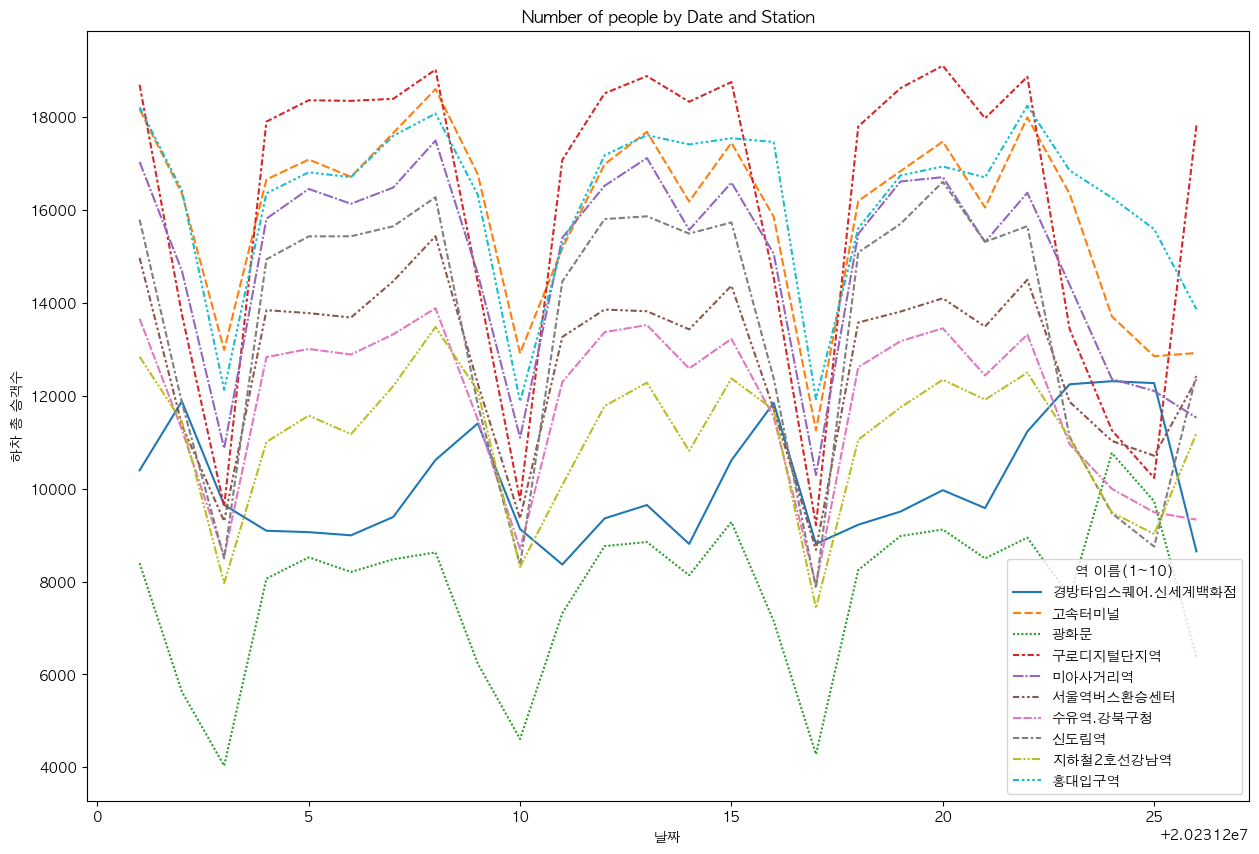

In [185]:
pivot_df_1 = data_sum_df_1.pivot(index='사용일자', columns='역', values='하차총승객수')

plt.figure(figsize=(15, 10))
sns.lineplot(data=pivot_df_1)
plt.title('Number of people by Date and Station')
plt.xlabel('날짜')
plt.ylabel('하차 총 승객수')
plt.legend(title='역 이름(1~10)')
plt.show()

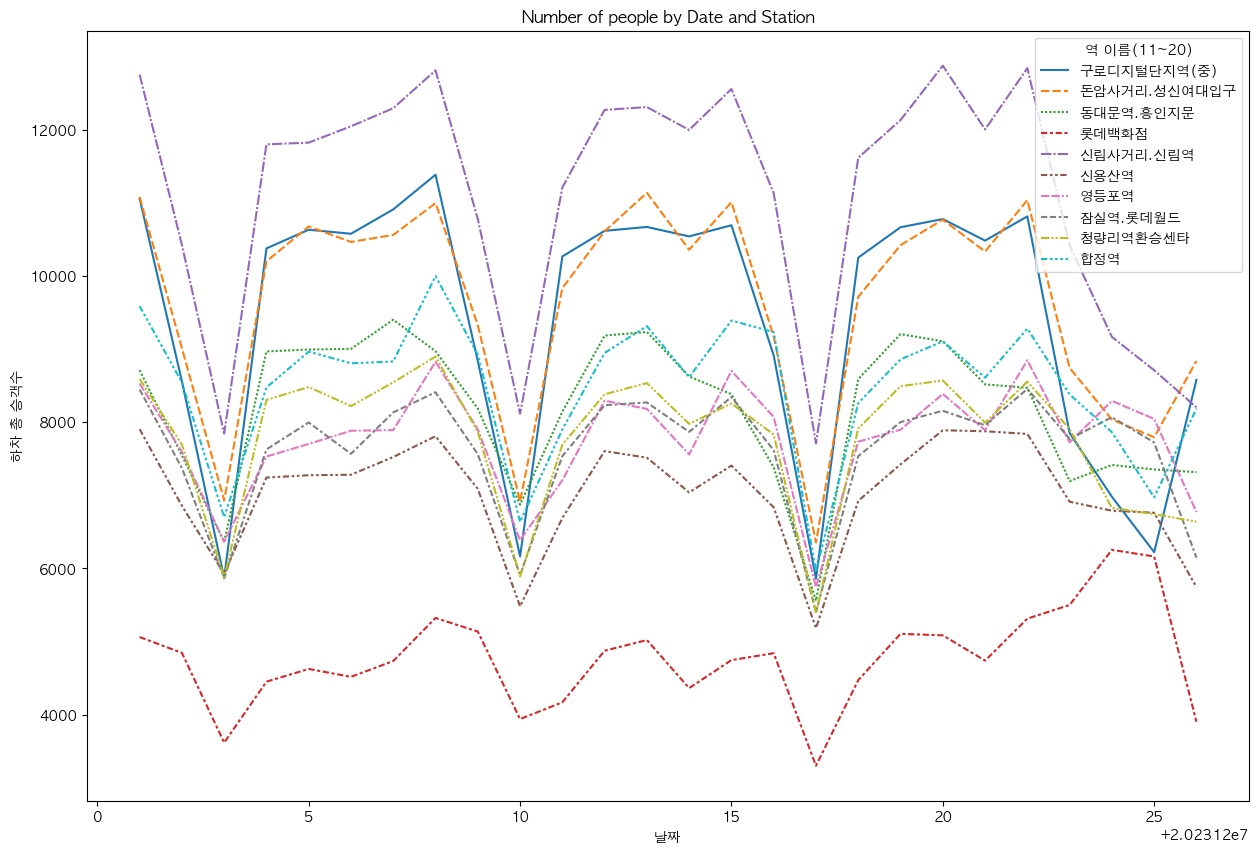

In [186]:
pivot_df_2 = data_sum_df_2.pivot(index='사용일자', columns='역', values='하차총승객수')

plt.figure(figsize=(15, 10))
sns.lineplot(data=pivot_df_2)
plt.title('Number of people by Date and Station')
plt.xlabel('날짜')
plt.ylabel('하차 총 승객수')
plt.legend(title='역 이름(11~20)')
plt.show()

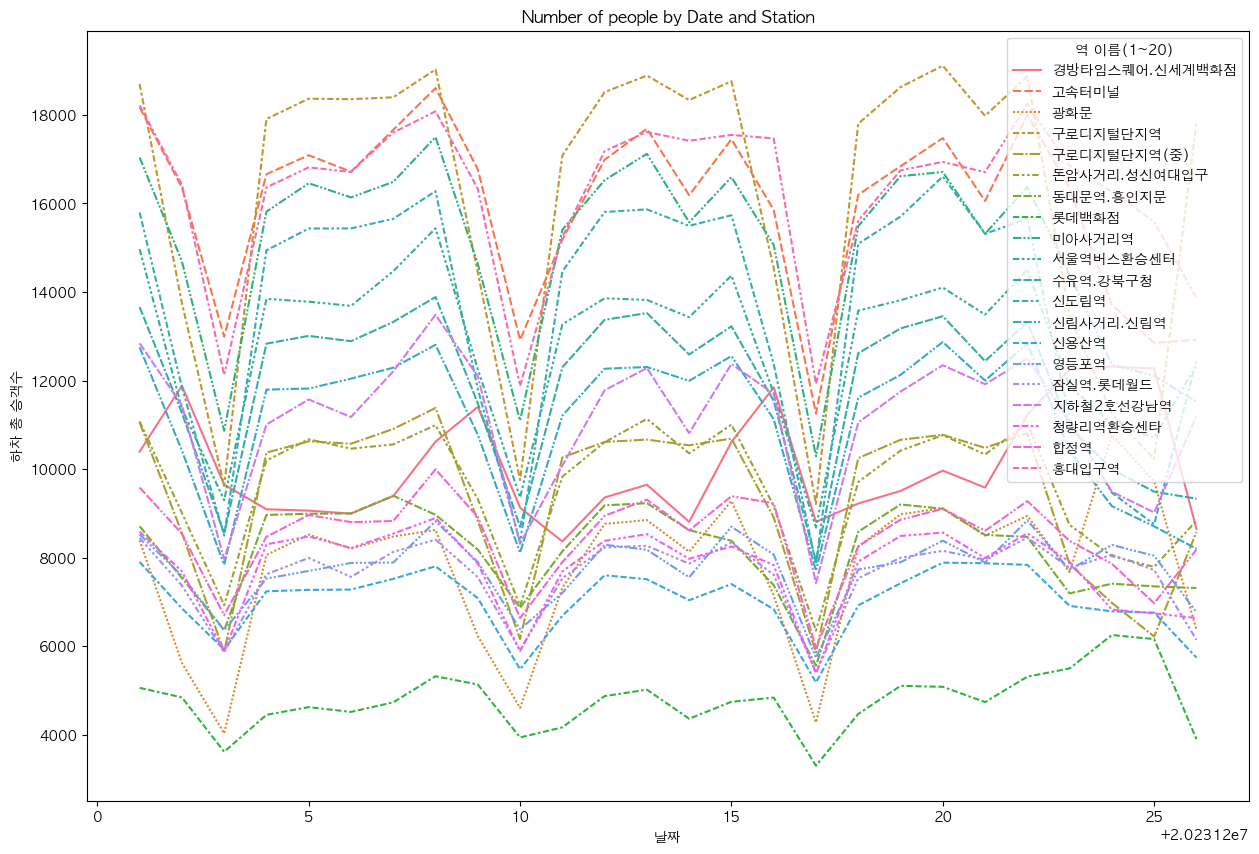

In [187]:
pivot_df = data_sum_df.pivot(index='사용일자', columns='역', values='하차총승객수')

plt.figure(figsize=(15, 10))
sns.lineplot(data=pivot_df)
plt.title('Number of people by Date and Station')
plt.xlabel('날짜')
plt.ylabel('하차 총 승객수')
plt.legend(title='역 이름(1~20)')
plt.show()

In [188]:
data_sum_df_hongdae = data_sum_df[data_sum_df['역']=='홍대입구역']

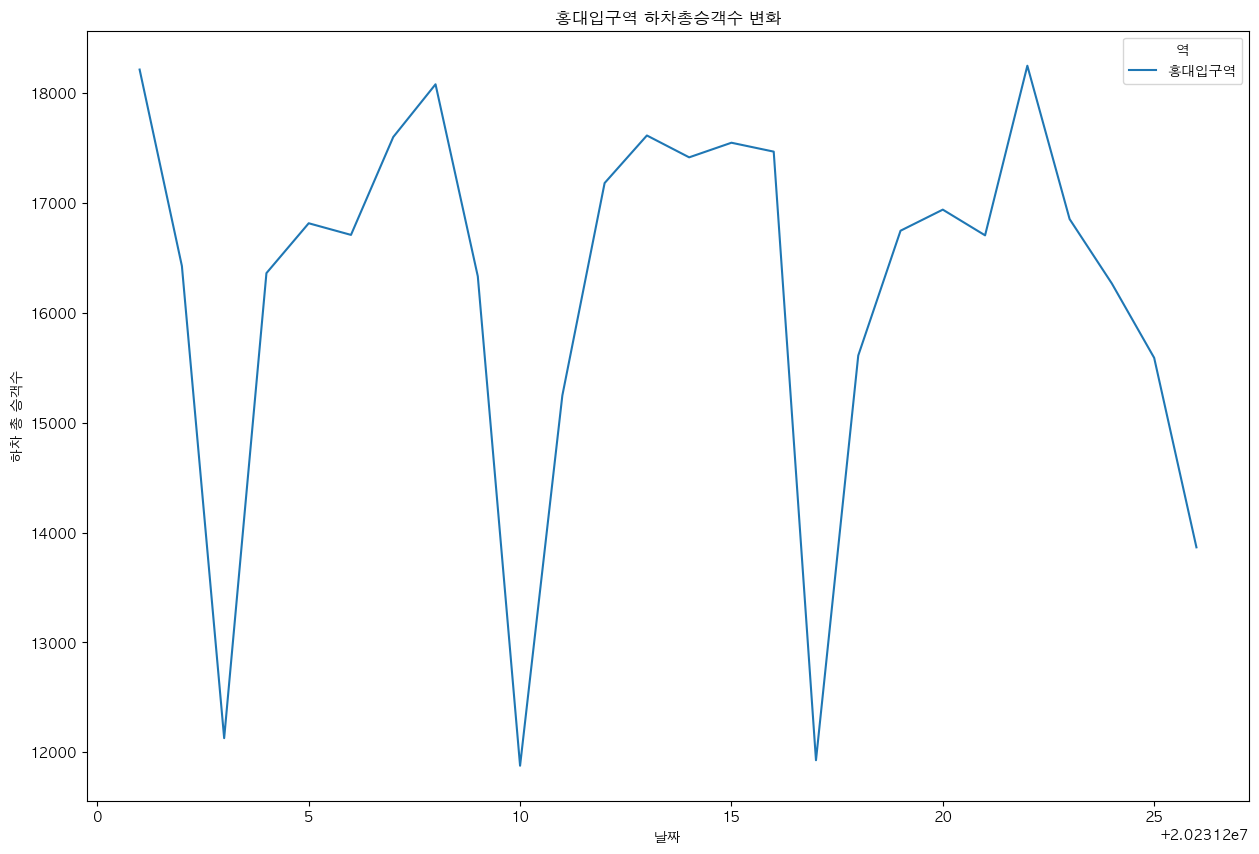

In [189]:
pivot_df_hongdae = data_sum_df_hongdae.pivot(index='사용일자', columns='역', values='하차총승객수')

plt.figure(figsize=(15, 10))
sns.lineplot(data=pivot_df_hongdae)
plt.title('홍대입구역 하차총승객수 변화')
plt.xlabel('날짜')
plt.ylabel('하차 총 승객수')
plt.show()

In [ ]:
# 12월 25일 당일이 아닌 22(금)일에 가장 많은 유동인구가 발생한다.
# 오히려 휴일 당일에는 유동인구가 감소하는 현상이 발생.